# plot atoms and W,h learnt from TL-NMF and JD+NMF (best2)
# final plots, see also notes_solutions_ratio10_itl100.py

In [1]:
from time import time
from os import path, mkdir

import matplotlib.pyplot as plt
#plt.style.use(['science','ieee'])

import numpy as np
import pickle

import soundfile as sf
from scipy import fftpack
import scipy.io as sio
import scipy.signal as sig
import scipy

from utils import plot_atoms8, load_obj, getwin, save_obj

In [2]:
sn = 'nonstationary440_sim1_5k'

mat_adr = '../datasets/' + sn + '.mat'

# load data to sort atoms
print('load mat data at:',mat_adr)
mat_dic = sio.loadmat(mat_adr)
ys = mat_dic['ys']
fs = mat_dic['fs'][0]
print('signals',ys.shape)
print('fs',fs)
L = 5000
K = 2
ws = 40e-3
window = 4
segsize = int(ws*fs)
for l in range(L):
    signal = ys[l,:]    
    win = getwin(window)
    iF,iT,X = sig.stft(signal,fs,window=win,nperseg=segsize,return_onesided=False,boundary='even')
    Y = np.real(scipy.ifft(X,axis=0))
    if l==0:
        M = Y.shape[0]
        N = Y.shape[1]
        F = M
        Ys = np.zeros((L,F,N))
    Ys[l,:,:] = Y

    

load mat data at: ../datasets/nonstationary440_sim1_5k.mat
signals (5000, 15000)
fs [5000]


In [27]:

Sout = [1,10,100,1000,5000]
tlname = ['tlnmf2_best2_itl100_Ttl1_Tnmf10_epsnmf5e-07_epsc5e-07_ws40ms_me_nbrun10/tlnmf2_sci_batch_K2_S1_win4',
          'tlnmf2_best2_itl100_Ttl1_Tnmf10_epsnmf5e-07_epsc5e-07_ws40ms_me_nbrun10/tlnmf2_sci_batch_K2_S10_win4',
          'tlnmf2_best2_itl100_Ttl1_Tnmf10_epsnmf5e-07_epsc5e-07_ws40ms_me_nbrun10/tlnmf2_sci_batch_K2_S100_win4',
          'tlnmf2_best2_itl100_Ttl1_Tnmf10_epsnmf5e-07_epsc5e-07_ws40ms_me_nbrun10/tlnmf2_sci_batch_K2_S1000_win4',
          'tlnmf2_best2_itl100_Ttl1_Tnmf10_epsnmf5e-07_epsc5e-07_ws40ms_me_nbrun10/tlnmf2_sci_batch_K2_S5000_win4',
         ]
jdname = ['tlnmfJD2_sci_batch_K2_S1_win4_ws40ms_epsnmf5e-07_epsc5e-07_best',
          'tlnmfJD2_sci_batch_K2_S10_win4_ws40ms_epsnmf5e-07_epsc5e-07_best',
          'tlnmfJD2_sci_batch_K2_S100_win4_ws40ms_epsnmf5e-07_epsc5e-07_best',
          'tlnmfJD2_sci_batch_K2_S1000_win4_ws40ms_epsnmf5e-07_epsc5e-07_best',
          'tlnmfJD2_sci_batch_K2_S5000_win4_ws40ms_epsnmf5e-07_epsc5e-07_best',
         ]  

def load_PhiWH(plotid,mode):    
    # get sorted Phi,W and original H
    #mode = 'jdnmf'
    #mode = 'tlnmf'  
    #plotid = 0 # S=1
    #plotid = 2 # S=100
    sid = plotid
    S = Sout[sid]
    if sid == 0:
        assert(S==1)
    elif sid == 2:
        assert(S==100)
    if mode == 'tlnmf':
        root_tlnmf = '../results_' + sn + '/'        
        tlnmf_obj = load_obj(root_tlnmf + tlname[sid])
        Phi = tlnmf_obj['Phi']
        W = tlnmf_obj['W']
        H = tlnmf_obj['H']
    elif mode == 'jdnmf':
        root_jd = '../results_jd_best2/' + sn + '_rseed100_itl100_inmf1000_nbrun10_me/'            
        jd_obj = load_obj(root_jd + jdname[sid])
        Phi = jd_obj['Phi']
        W = jd_obj['W']
        H = jd_obj['H']        

    # compute minimal empirical of E | Phi Y|^2 with S samples            
    Phis, idx_sorted = plot_atoms8(Phi,Ys[0:S,:,:])
    Ws = W[idx_sorted[::-1],:]
    
    return Phis,Ws,H

power ratio 0.9989629713667371
Phis (8, 200)
power ratio 0.9989525206923489
Phis (8, 200)
power ratio 0.9989621107696115
Phis (8, 200)
power ratio 0.9989620445608399
Phis (8, 200)


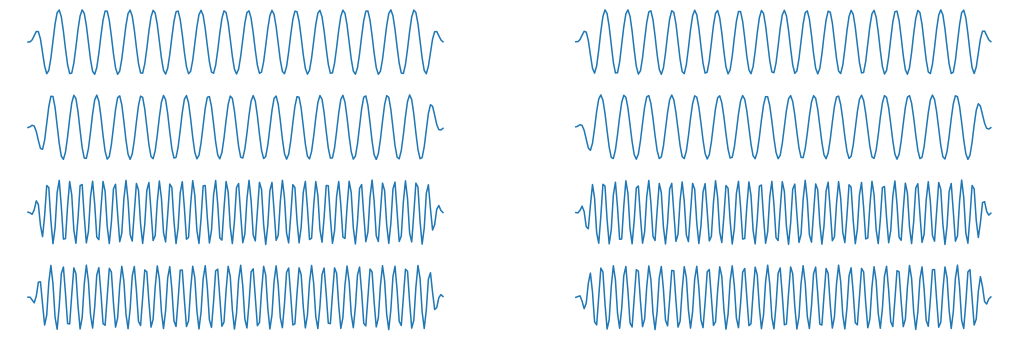

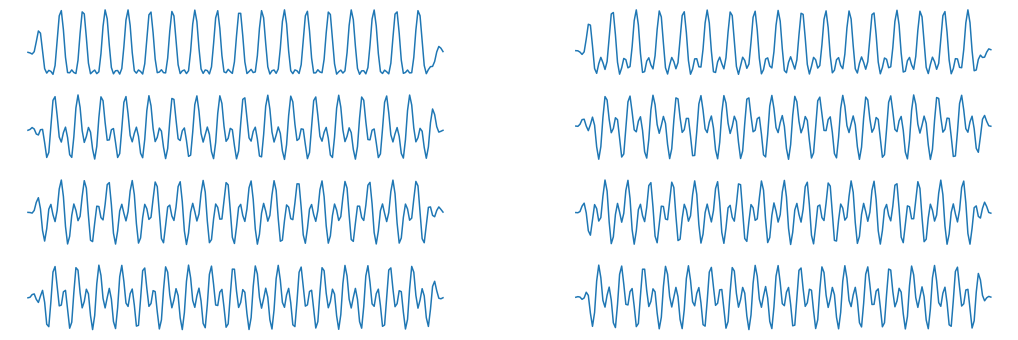

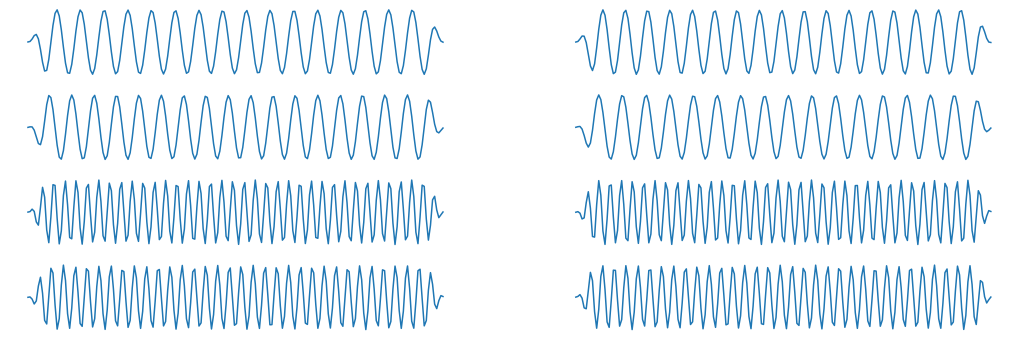

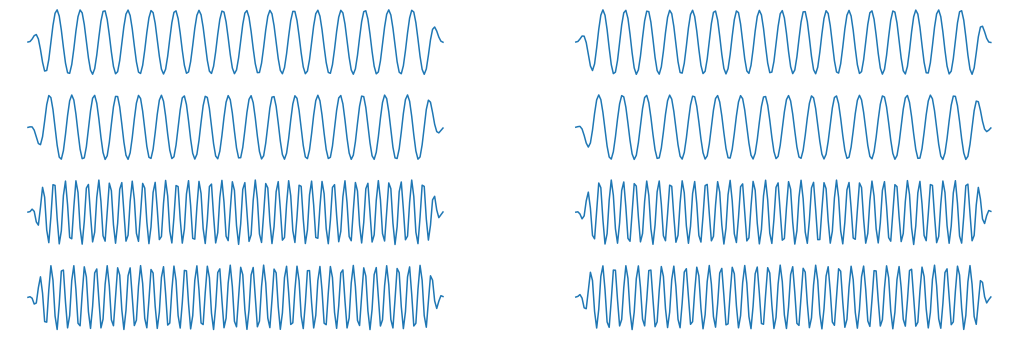

In [28]:
# plot Phi, W, H

Phi_ = [] # list of Phis with shape [natoms,F]
W_ = []
H_ = []

Phi,W,H = load_PhiWH(0,'tlnmf')
Phi_.append(Phi)

Phi,W,H = load_PhiWH(0,'jdnmf')
Phi_.append(Phi)

Phi,W,H = load_PhiWH(2,'tlnmf')
Phi_.append(Phi)

Phi,W,H = load_PhiWH(2,'jdnmf')
Phi_.append(Phi)


In [29]:
def compute_distance(Phi1,Phi2):
    # Phi1: natoms x F
    # Phi2: natoms x F
    
    #A = Phi1.T
    #B = Phi2.T    
    print(Phi1.shape,Phi2.shape)
    U,Sig,Vt = np.linalg.svd(Phi1 @ Phi2.T)
    #print(Sig)
    angles = np.arccos(Sig)
    return np.sqrt(np.sum(angles**2))

dist_ = np.zeros((4,4))
for i in range(4):
    for j in range(i+1,4):
        dist = compute_distance(Phi_[i],Phi_[j])
        #print(i,j,dist)
        dist_[i,j] = dist
        
print(dist_)

(8, 200) (8, 200)
(8, 200) (8, 200)
(8, 200) (8, 200)
(8, 200) (8, 200)
(8, 200) (8, 200)
(8, 200) (8, 200)
[[0.         0.00813287 0.00489192 0.00500109]
 [0.         0.         0.00872655 0.00873248]
 [0.         0.         0.         0.0002531 ]
 [0.         0.         0.         0.        ]]


In [8]:
def show_WH(K,N,Ws,FONT_SIZE = 20):
    plt.figure(figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.subplot(121)
    if K>=2:
        plt.plot(range(1,F+1),Ws[:,0],'o',markersize=12)
        plt.plot(range(1,F+1),Ws[:,1],'.',markersize=12)
        if K==3:
            plt.plot(range(1,F+1),Ws[:,2],'x',markersize=12)

    plt.title('$[\mathbf{W}]_{mk}$',size=FONT_SIZE) # *1.5)
    plt.xlabel('m',size=FONT_SIZE)
    plt.grid('on')
    plt.xlim(0,24)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FONT_SIZE)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FONT_SIZE)

    if K==2:
        plt.legend(['k=1','k=2'],prop={"size":FONT_SIZE})
    elif K==3:
        plt.legend(['k=1','k=2','k=3'],prop={"size":FONT_SIZE})

    ax = plt.subplot(122)
    if K>=2:
        plt.plot(range(1,N+1),H.T[:,0],'-')
        plt.plot(range(1,N+1),H.T[:,1],'--')
        if K==3:
            plt.plot(range(1,N+1),H.T[:,2],':')

    plt.title('$[\mathbf{H}]_{kn}$',size=FONT_SIZE) # *1.5)
    plt.xlabel('n',size=FONT_SIZE)
    plt.xlim(0,N)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FONT_SIZE)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FONT_SIZE)



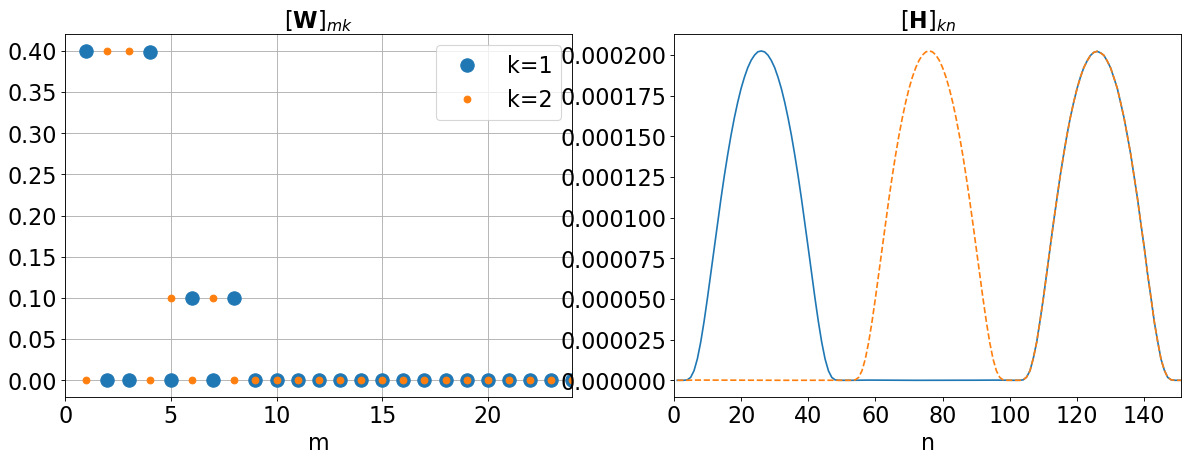

In [9]:
show_WH(K,N,Ws)